In [2]:
import numpy as np
import random
import torch
import torch.nn as nn
import gymnasium as gym
import time
from tqdm import tqdm
import winsound
from torch.distributions import Normal, Categorical
from copy import deepcopy

from Orientation3D import *
from PPO import *

import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns

from IPython.display import display, clear_output

sns.set_theme()

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 6.0)

%load_ext autoreload
%autoreload 2

## 3D Ориентация, PPO

## II. Управление с полной обратной связью

### Обучение

In [4]:
env = Orientation3D(dt=1e-2)

agent = PPO(
    state_dim=4, 
    action_dim=3, 
    max_action=200, 
    observable_states=[0, 1, 2, 3],
    gamma=1
)

agent.pi_model = torch.load('models/orientation3D_pi_170.pth')
agent.v_model = torch.load('models/orientation3D_v_170.pth')

c:\Users\никита\AppData\Local\Programs\Python\Python311\Lib\site-packages\gym\spaces\box.py:112: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [ ]:
rewards = train_ppo(
    env, 
    agent, 
    episode_n=10, 
    trajectory_n=500, 
    advantage='default'
)

In [ ]:
# history = []
history.extend(rewards)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


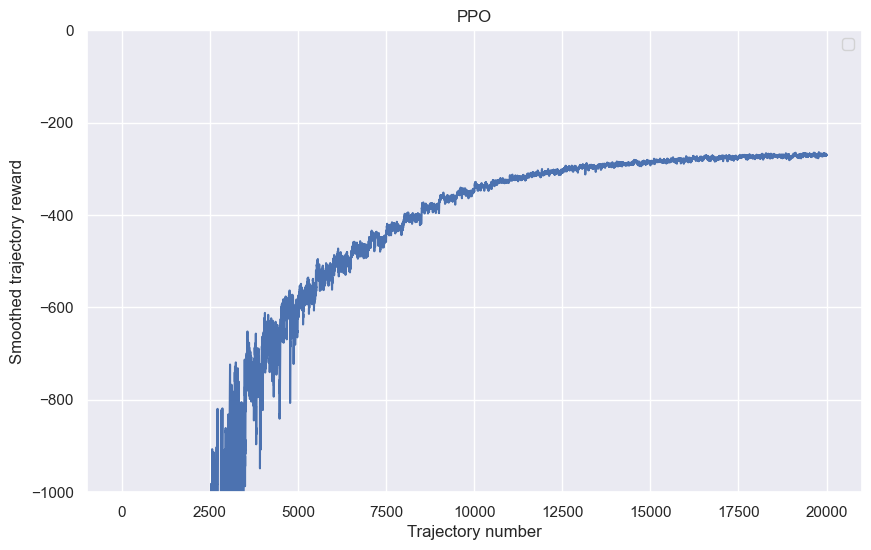

In [40]:
plot_history(history, ylim=-10**3)

### Валидация

In [5]:
validation_env = Orientation3D(dt=1e-3)

In [7]:
validation(validation_env, agent, validation_n=10, prediction=True)

-172.26987710680464

### Управление:

In [27]:
def get_reward(env, agent):
    traj = agent.get_trajectory(env, prediction=True, initial_state=np.array([0, 24, 16, 16]))
    return sum(traj['rewards'])

In [39]:
get_reward(env, agent)

-173.8024549717279

In [40]:
get_reward(validation_env, agent)

-172.6060605410851

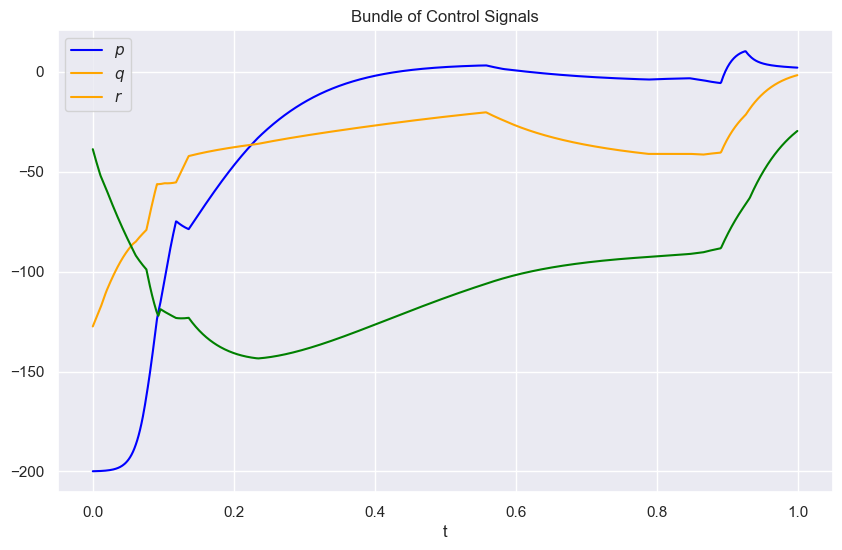

In [32]:
plot_u(validation_env, agent, initial_state=[0, 24, 16, 16])

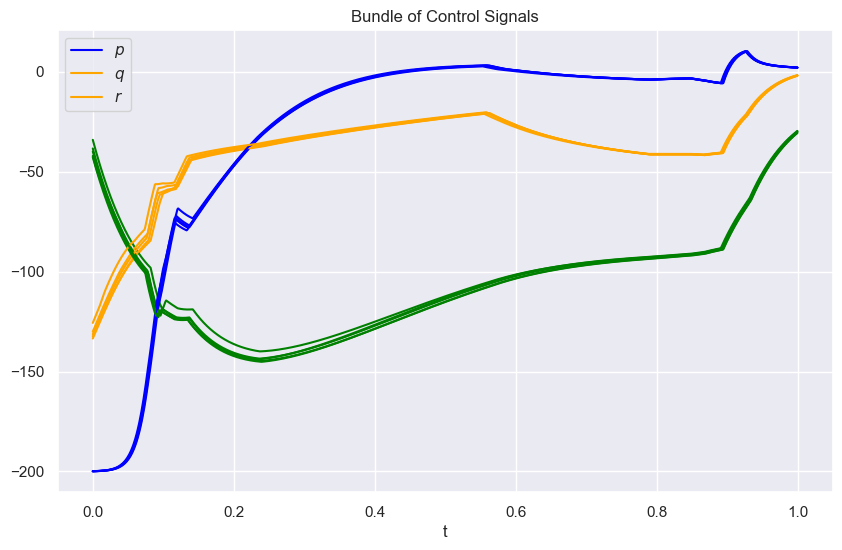

In [33]:
plot_u(validation_env, agent, n=5)

0.1157905172742943 0.06094399964354351 0.07887672129816206


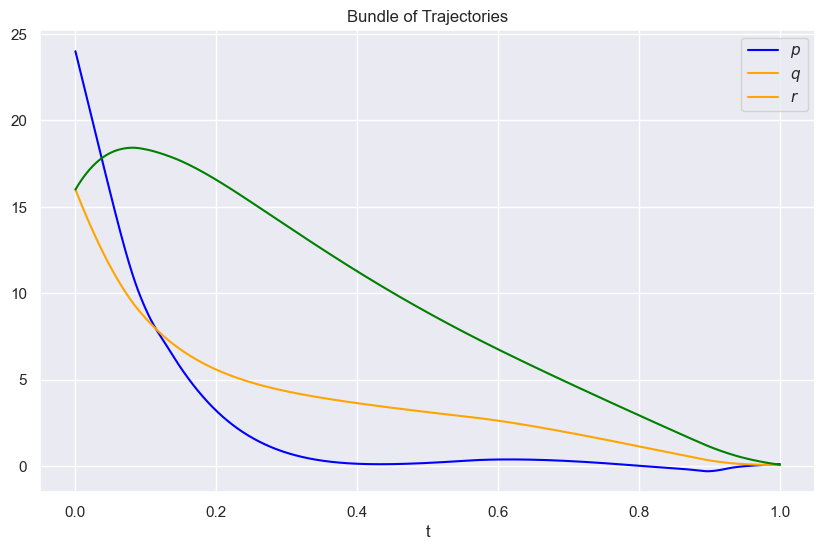

In [36]:
plot_x(validation_env, agent, 1, [0, 24, 16, 16])

0.11547542390820388 0.06099865398608704 0.08010386451134709
0.11457153429401433 0.06103996959350128 0.08365531076785157
0.11496102007757876 0.061161934182892015 0.082085332042316
0.11387277959848281 0.06126676365987817 0.0863453915395336
0.11507979851824847 0.0613210500791297 0.08157204802074991


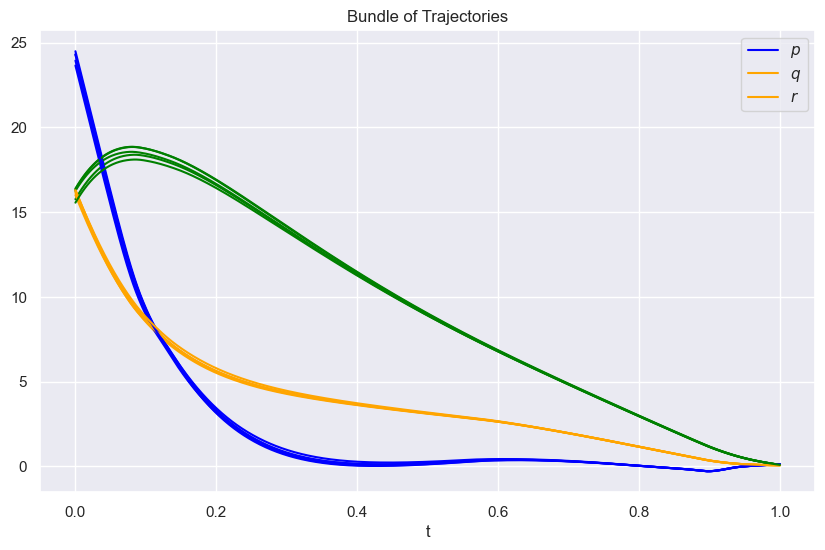

In [44]:
plot_x(validation_env, agent, 5)

In [50]:
# torch.save(agent.pi_model, 'models/orientation3D_pi_170.pth')
# torch.save(agent.v_model, 'models/orientation3D_v_170.pth')